In [2]:
import warnings
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
import time
warnings.simplefilter("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, make_scorer


df = pd.read_csv('kc_house_data.csv' , sep=',')

if not df.empty:
    print('Succesfully imported Dataframe and libraries!')

Succesfully imported Dataframe and libraries!


# Import du dataset et traitement

In [3]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
print(f'le nombre de ligne du dataset est {df.shape[0]}')
print(f'le nombre de features du dataset est {df.shape[1]}')

le nombre de ligne du dataset est 21613
le nombre de features du dataset est 21


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['date'] = pd.to_datetime(df['date'])
# df.drop(columns = ['id'], inplace=True)
print(df.info())

print(f"Il y a {df.duplicated().sum()} valeurs dupliquées dans le dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
colonnes = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['lat', 'long','zip code']]
df[colonnes].describe().apply(lambda x: x.apply('{0:.2f}'.format))


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,6210.00,871200.00


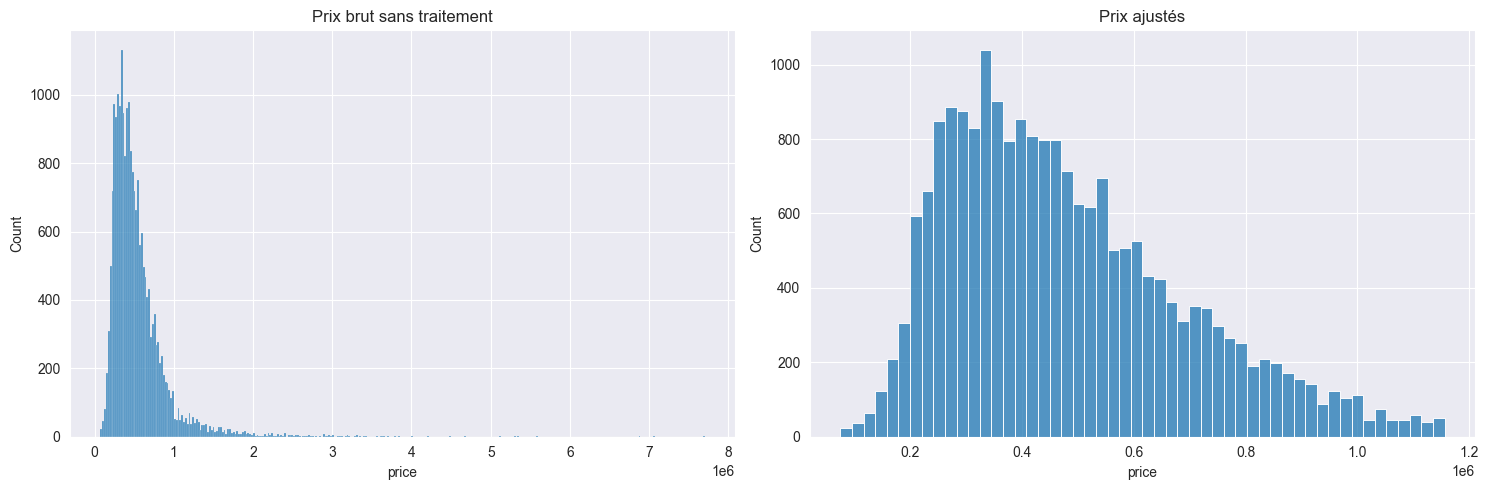

In [8]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Prix brut sans traitement')
sns.histplot(df['price'])

plt.subplot(1,2,2)
plt.title('Prix ajustés')
df_corr = df[df.price <= df.price.quantile(0.95)]
sns.histplot(df_corr.price)
plt.tight_layout()
plt.show()

<Axes: xlabel='long', ylabel='lat'>

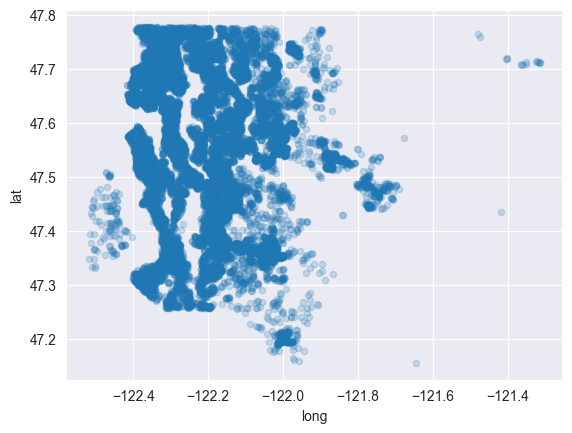

In [9]:
df.plot(kind = "scatter", x='long', y='lat', alpha = 0.2)

In [10]:
df_corr[['price']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

df_corr.drop(columns=['id','lat','long'], inplace=True)
print(df_corr.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


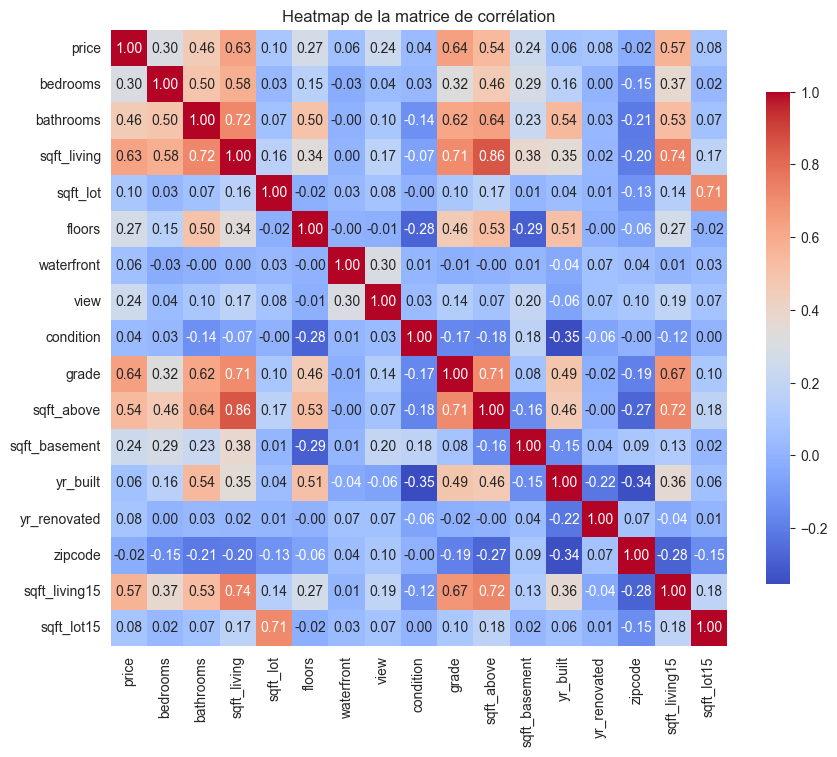

In [11]:
data_numeric = df_corr.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={'shrink': .8})
plt.title("Heatmap de la matrice de corrélation")
plt.show()

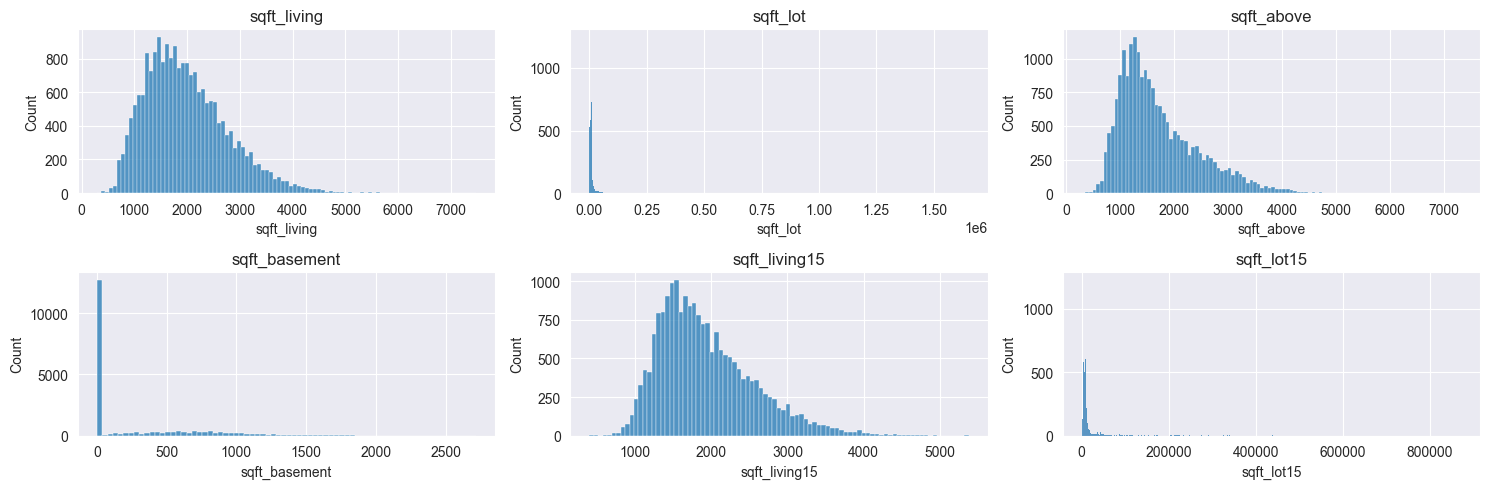

In [12]:
import math

area = [col for col in df.columns if col.startswith('sqft')]
fig = plt.figure(figsize = (15, 5))

for i, col in enumerate(area, 1):
    plt.subplot(math.ceil(len(area)/3), 3, i)
    plt.title(col)
    sns.histplot(df_corr[col])

plt.tight_layout()
plt.show()

In [13]:
df_corr['has_basement'] = df_corr['sqft_basement'] > 0
df_corr['living_in_m2'] = df_corr['sqft_living'] * 0.092903
df_corr = df_corr[df_corr['living_in_m2'] <= df_corr['living_in_m2'].quantile(0.99)]

df_corr.drop(columns = ['sqft_above','sqft_basement','sqft_living','sqft_living15','sqft_lot','sqft_lot15'], inplace=True)

print(df_corr.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'has_basement', 'living_in_m2'],
      dtype='object')


In [14]:
df_corr['was_renovated'] = df_corr['yr_renovated'] > 0
somme = df_corr.was_renovated.sum()
print(df_corr)

            date     price  bedrooms  bathrooms  floors  waterfront  view  \
0     2014-10-13  221900.0         3       1.00     1.0           0     0   
1     2014-12-09  538000.0         3       2.25     2.0           0     0   
2     2015-02-25  180000.0         2       1.00     1.0           0     0   
3     2014-12-09  604000.0         4       3.00     1.0           0     0   
4     2015-02-18  510000.0         3       2.00     1.0           0     0   
...          ...       ...       ...        ...     ...         ...   ...   
21608 2014-05-21  360000.0         3       2.50     3.0           0     0   
21609 2015-02-23  400000.0         4       2.50     2.0           0     0   
21610 2014-06-23  402101.0         2       0.75     2.0           0     0   
21611 2015-01-16  400000.0         3       2.50     2.0           0     0   
21612 2014-10-15  325000.0         2       0.75     2.0           0     0   

       condition  grade  yr_built  yr_renovated  zipcode  has_basement  \
0

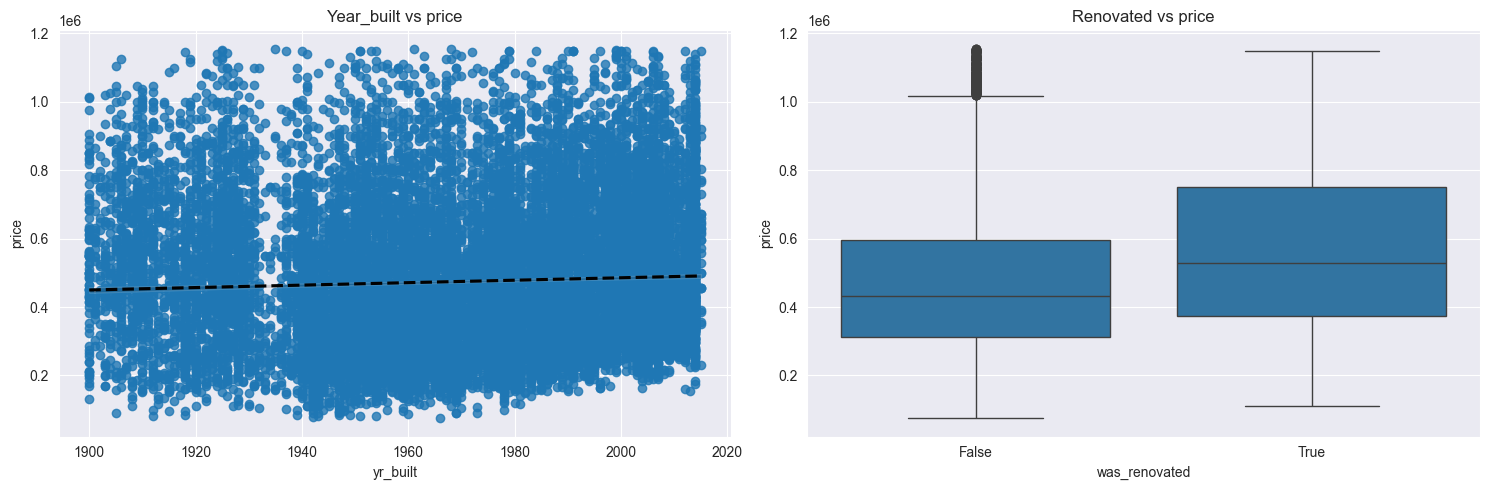

In [15]:
fig = plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Year_built vs price')
sns.regplot(x='yr_built', y='price', data=df_corr, line_kws={'color': 'black', 'linestyle': '--'})

plt.subplot(1, 2, 2)
plt.title('Renovated vs price')
sns.boxplot(x='was_renovated', y='price', data=df_corr)

plt.tight_layout()
plt.show()

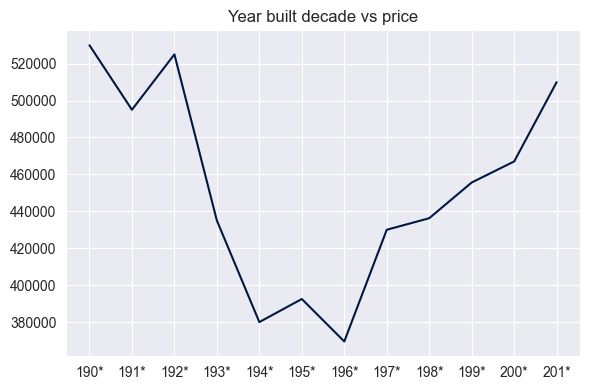

In [16]:
fig = plt.figure(figsize = (6, 4))
plt.title('Year built decade vs price')

df_corr['yr_built_cat'] = df_corr['yr_built'].astype(str).str[:3] + '*'
df_graph = df_corr[['yr_built_cat', 'price']].groupby('yr_built_cat').median().reset_index()
plt.plot(df_graph['yr_built_cat'] , df_graph['price'], color='#021841ff')

plt.tight_layout()
plt.show()

In [17]:
df_corr.drop(columns = ['yr_renovated','yr_built','yr_built_cat'], inplace=True)
print(df_corr.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'has_basement', 'living_in_m2',
       'was_renovated'],
      dtype='object')


In [18]:
# df_corr['has_nice_view'] = df_corr['view'] > 0
print(df_corr.columns)
# df_corr.drop(columns = ['view', 'waterfront'], inplace=True)
print(df_corr.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'has_basement', 'living_in_m2',
       'was_renovated'],
      dtype='object')
Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'has_basement', 'living_in_m2',
       'was_renovated'],
      dtype='object')


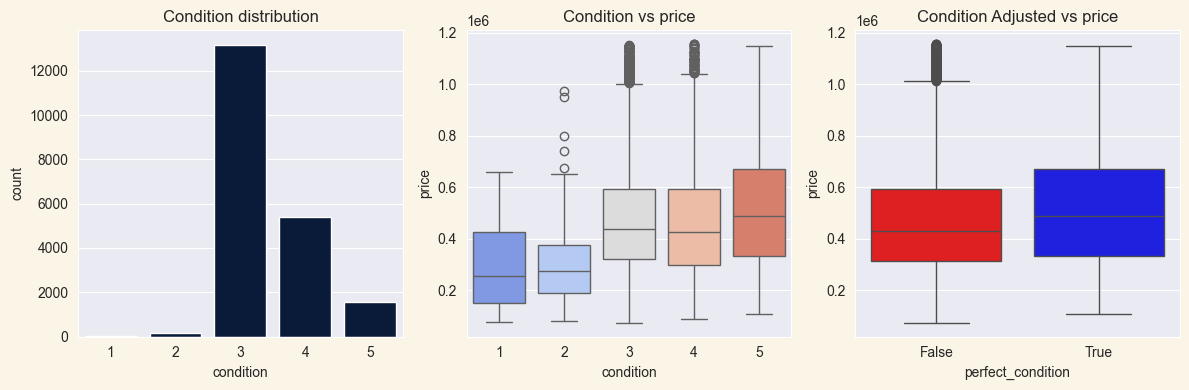

In [19]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 3, 1)
plt.title('Condition distribution')
sns.countplot(x='condition', data=df_corr, color = '#021841ff')

plt.subplot(1, 3, 2)
plt.title('Condition vs price')
n_colors = len(df_corr['condition'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='condition', y='price', data=df_corr, palette=palette)

plt.subplot(1, 3, 3)
plt.title('Condition Adjusted vs price')
df_corr['perfect_condition'] = df_corr['condition'] > 4
palette = {'True': 'blue', 'False': 'red'}
sns.boxplot(x='perfect_condition', y='price', data=df_corr, palette=palette)

plt.tight_layout()
plt.show()

In [20]:
# df_corr.drop(columns = ["condition"], inplace=True)
print(df_corr.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'has_basement', 'living_in_m2',
       'was_renovated', 'perfect_condition'],
      dtype='object')


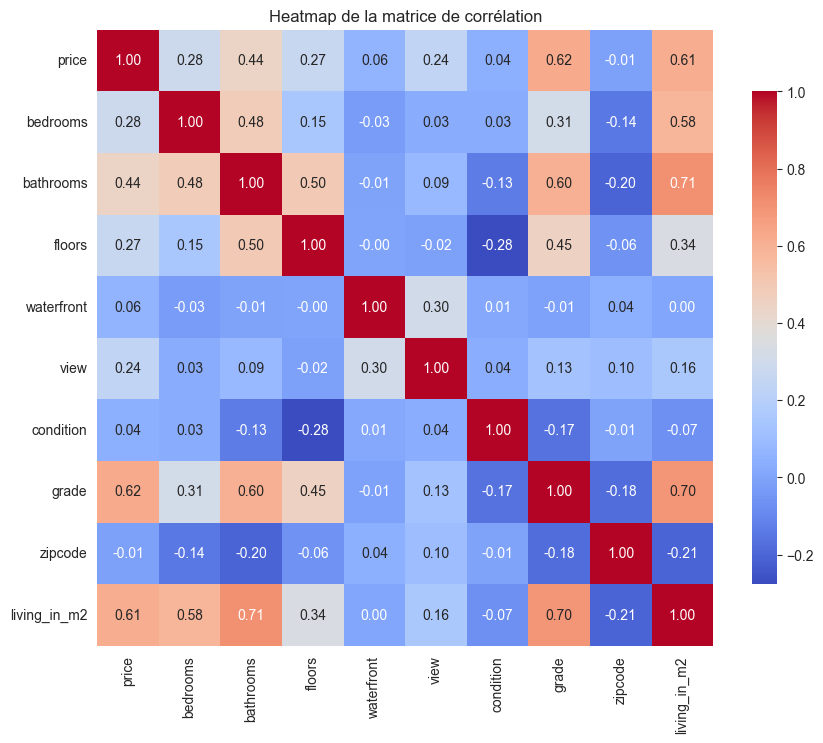

In [21]:
data_numeric = df_corr.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={'shrink': .8})
plt.title("Heatmap de la matrice de corrélation")
plt.show()

In [22]:
print(df_corr.head(10))
print(df.grade.value_counts().sort_index().reset_index())

         date     price  bedrooms  bathrooms  floors  waterfront  view  \
0  2014-10-13  221900.0         3       1.00     1.0           0     0   
1  2014-12-09  538000.0         3       2.25     2.0           0     0   
2  2015-02-25  180000.0         2       1.00     1.0           0     0   
3  2014-12-09  604000.0         4       3.00     1.0           0     0   
4  2015-02-18  510000.0         3       2.00     1.0           0     0   
6  2014-06-27  257500.0         3       2.25     2.0           0     0   
7  2015-01-15  291850.0         3       1.50     1.0           0     0   
8  2015-04-15  229500.0         3       1.00     1.0           0     0   
9  2015-03-12  323000.0         3       2.50     2.0           0     0   
10 2015-04-03  662500.0         3       2.50     1.0           0     0   

    condition  grade  zipcode  has_basement  living_in_m2  was_renovated  \
0           3      7    98178         False    109.625540          False   
1           3      7    98125    

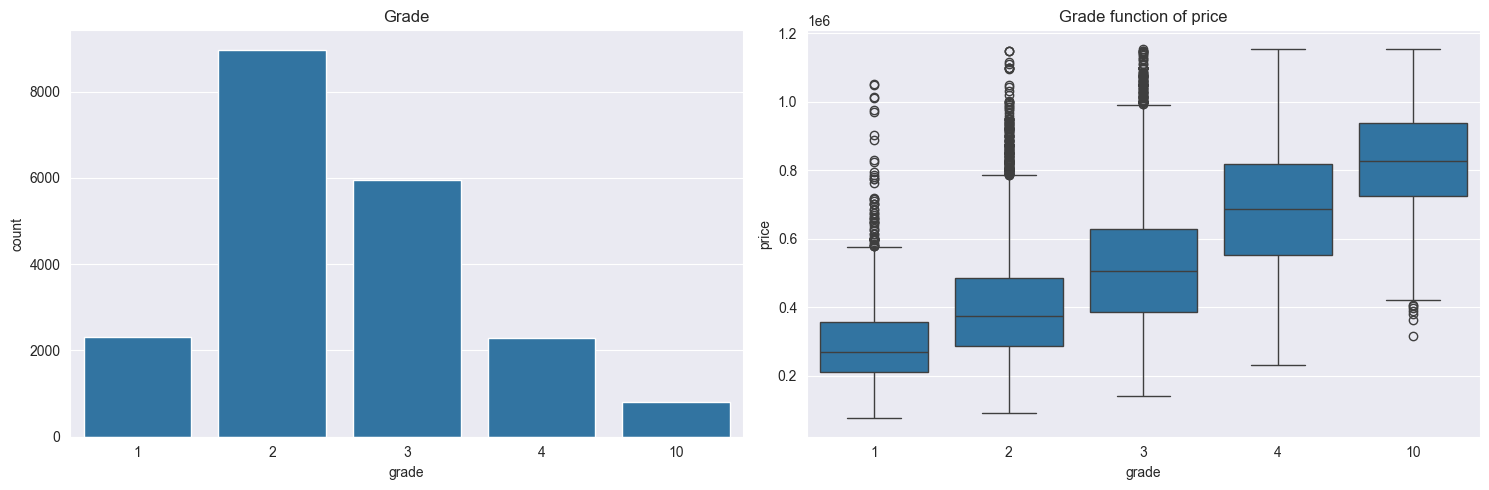

In [23]:
new_grade = list()
for value in df_corr.grade:
    if int(value) <= 6:
        new_grade.append(1)
    elif int(value) >= 10:
        new_grade.append(10)
    elif int(value) in [7,8,9]:
        new_grade.append(value-5)

df_corr['grade'] = new_grade

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Grade')
sns.countplot(x='grade', data=df_corr)

plt.subplot(1,2,2)
plt.title('Grade function of price')
sns.boxplot(x='grade', y='price', data=df_corr)

plt.tight_layout()
plt.show()

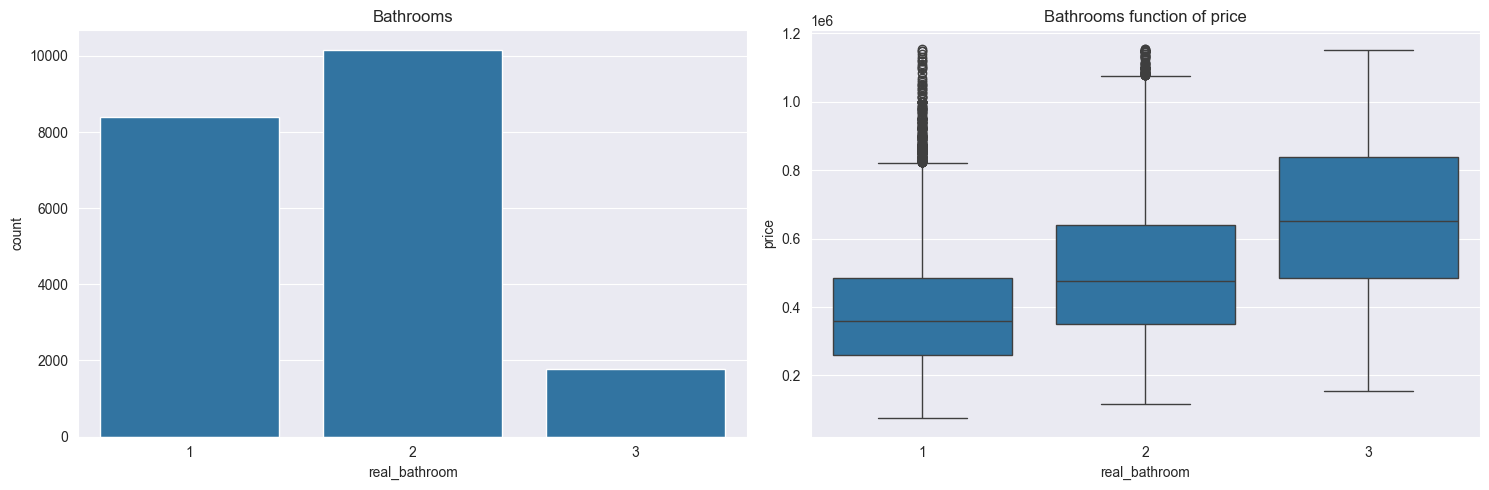

In [24]:
df_corr['real_bathroom'] = df_corr['bathrooms'].astype(int)
df_corr['has_lavatory'] = df_corr['bathrooms']%1 > 0

new_bath = list()
for value in df_corr.real_bathroom:
    if int(value) <= 1:
        new_bath.append(1)
    elif int(value) >= 3:
        new_bath.append(3)
    else:
        new_bath.append(2)
        
df_corr['real_bathroom'] = new_bath

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Bathrooms')
sns.countplot(x='real_bathroom', data=df_corr)

plt.subplot(1,2,2)
plt.title('Bathrooms function of price')
sns.boxplot(x='real_bathroom', y='price', data=df_corr)

plt.tight_layout()
plt.show()

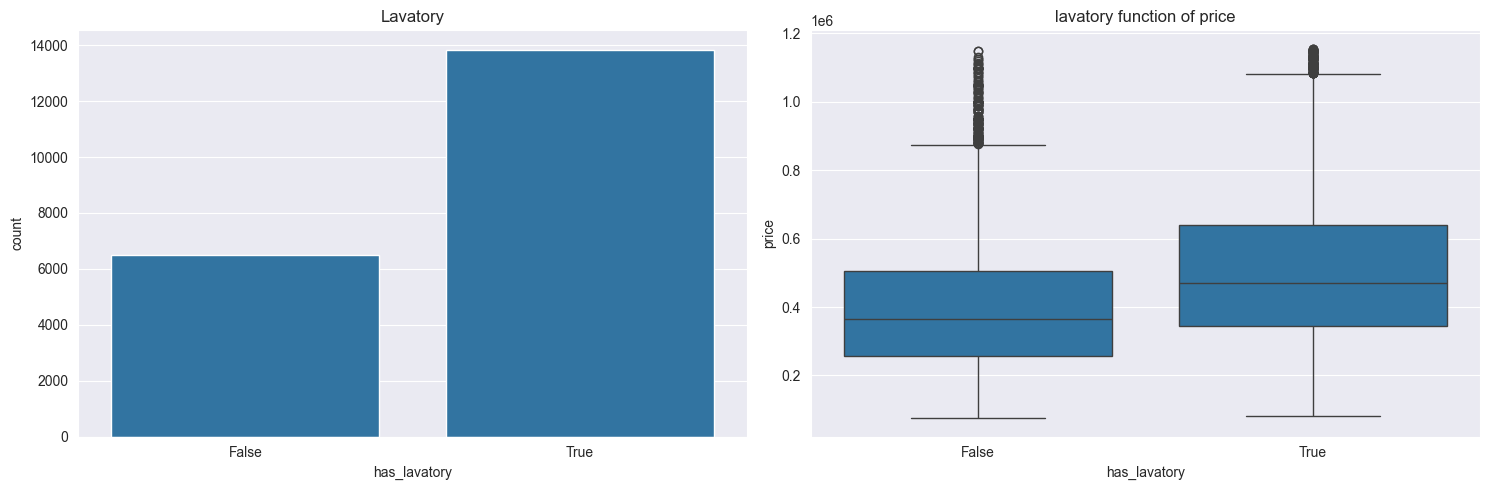

In [25]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Lavatory')
sns.countplot(x='has_lavatory', data=df_corr)

plt.subplot(1,2,2)
plt.title('lavatory function of price')
sns.boxplot(x='has_lavatory', y='price', data=df_corr)

plt.tight_layout()
plt.show()

In [26]:
df_corr.drop(columns = ['bathrooms','waterfront','view'], inplace=True)
print(df_corr.head())

        date     price  bedrooms  floors  condition  grade  zipcode  \
0 2014-10-13  221900.0         3     1.0          3      2    98178   
1 2014-12-09  538000.0         3     2.0          3      2    98125   
2 2015-02-25  180000.0         2     1.0          3      1    98028   
3 2014-12-09  604000.0         4     1.0          5      2    98136   
4 2015-02-18  510000.0         3     1.0          3      3    98074   

   has_basement  living_in_m2  was_renovated  perfect_condition  \
0         False     109.62554          False              False   
1          True     238.76071           True              False   
2         False      71.53531          False              False   
3          True     182.08988          False               True   
4         False     156.07704          False              False   

   real_bathroom  has_lavatory  
0              1         False  
1              2          True  
2              1         False  
3              3         False  
4    

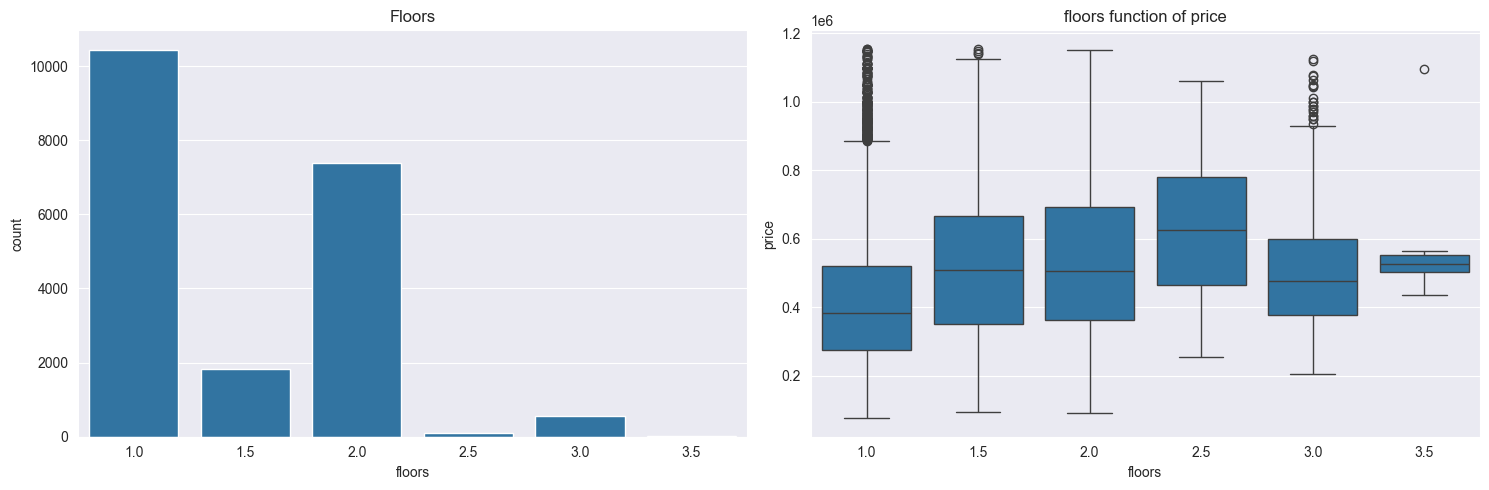

In [27]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Floors')
sns.countplot(x='floors', data=df_corr)

plt.subplot(1, 2, 2)
plt.title('floors function of price')
sns.boxplot(x='floors', y='price', data=df_corr)

plt.tight_layout()
plt.show()

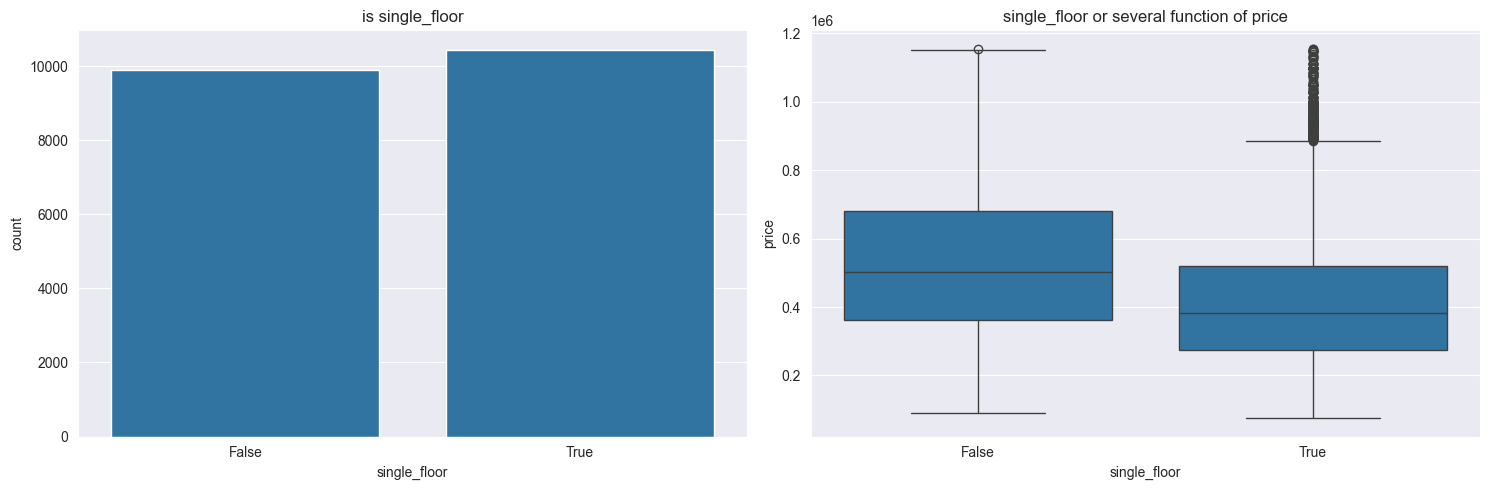

In [28]:
df_corr['single_floor'] = df_corr['floors'] == 1
df_corr.drop(columns=['floors'], inplace=True)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('is single_floor')
sns.countplot(x='single_floor', data=df_corr)

plt.subplot(1, 2, 2)
plt.title('single_floor or several function of price')
sns.boxplot(x='single_floor', y='price', data=df_corr)

plt.tight_layout()
plt.show()

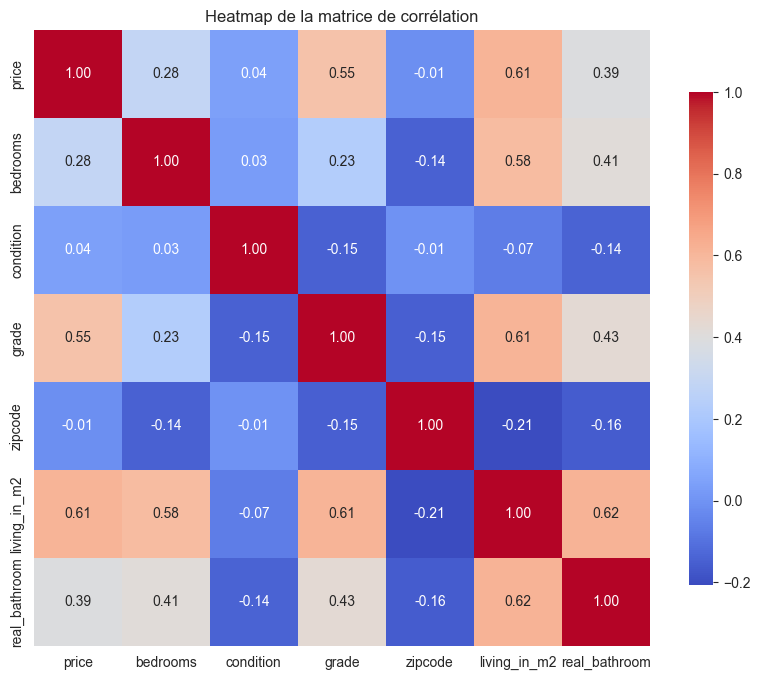

In [29]:
data_numeric = df_corr.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={'shrink': .8})
plt.title("Heatmap de la matrice de corrélation")
plt.show()

In [30]:
print(df_corr.head())

        date     price  bedrooms  condition  grade  zipcode  has_basement  \
0 2014-10-13  221900.0         3          3      2    98178         False   
1 2014-12-09  538000.0         3          3      2    98125          True   
2 2015-02-25  180000.0         2          3      1    98028         False   
3 2014-12-09  604000.0         4          5      2    98136          True   
4 2015-02-18  510000.0         3          3      3    98074         False   

   living_in_m2  was_renovated  perfect_condition  real_bathroom  \
0     109.62554          False              False              1   
1     238.76071           True              False              2   
2      71.53531          False              False              1   
3     182.08988          False               True              3   
4     156.07704          False              False              2   

   has_lavatory  single_floor  
0         False          True  
1          True         False  
2         False          True  


In [31]:
df_corr['month'] = df_corr['date'].dt.month
df_corr.drop(columns = ['date'], inplace=True)
print(df_corr.head())


      price  bedrooms  condition  grade  zipcode  has_basement  living_in_m2  \
0  221900.0         3          3      2    98178         False     109.62554   
1  538000.0         3          3      2    98125          True     238.76071   
2  180000.0         2          3      1    98028         False      71.53531   
3  604000.0         4          5      2    98136          True     182.08988   
4  510000.0         3          3      3    98074         False     156.07704   

   was_renovated  perfect_condition  real_bathroom  has_lavatory  \
0          False              False              1         False   
1           True              False              2          True   
2          False              False              1         False   
3          False               True              3         False   
4          False              False              2         False   

   single_floor  month  
0          True     10  
1         False     12  
2          True      2  
3         

In [32]:
df_final = df_corr.groupby(by='zipcode').agg(region_price=('price', 'mean')).reset_index()
df_final['quartile_zone'] = pd.qcut(df_final['region_price'], q=4, labels=[1, 2, 3, 4])
df_corr = df_corr.merge(df_final[['zipcode', 'quartile_zone']], how='left', on='zipcode')

print(df_corr.head())

      price  bedrooms  condition  grade  zipcode  has_basement  living_in_m2  \
0  221900.0         3          3      2    98178         False     109.62554   
1  538000.0         3          3      2    98125          True     238.76071   
2  180000.0         2          3      1    98028         False      71.53531   
3  604000.0         4          5      2    98136          True     182.08988   
4  510000.0         3          3      3    98074         False     156.07704   

   was_renovated  perfect_condition  real_bathroom  has_lavatory  \
0          False              False              1         False   
1           True              False              2          True   
2          False              False              1         False   
3          False               True              3         False   
4          False              False              2         False   

   single_floor  month quartile_zone  
0          True     10             1  
1         False     12          

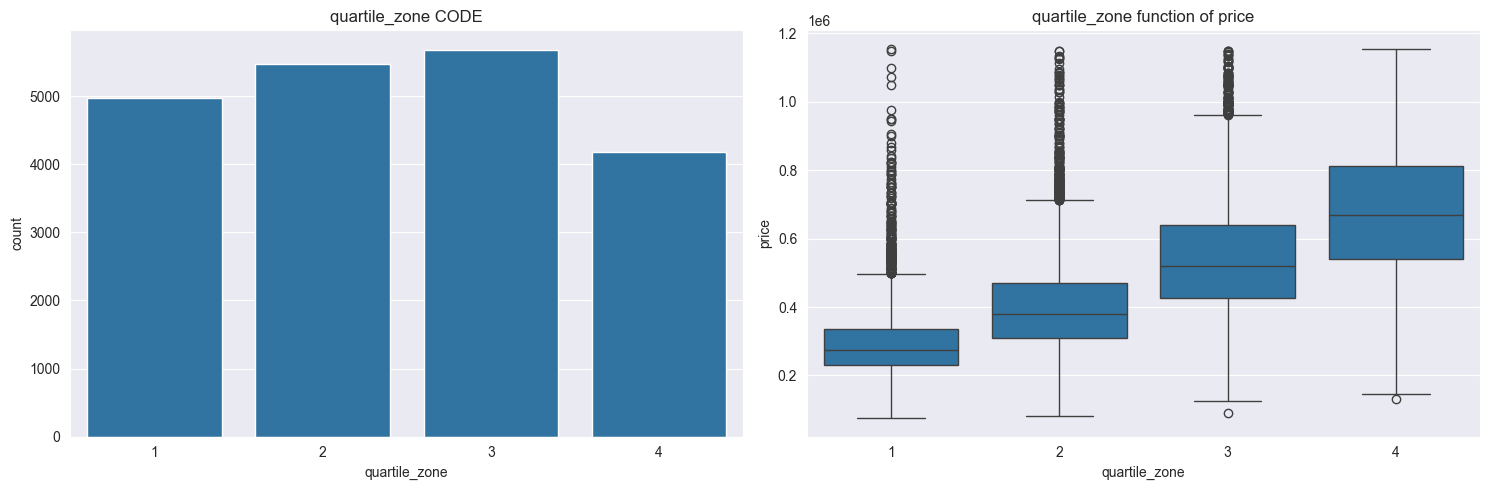

KeyError: "['quartile_zone'] not found in axis"

In [34]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('quartile_zone CODE')
sns.countplot(x='quartile_zone', data=df_corr)

plt.subplot(1, 2, 2)
plt.title('quartile_zone function of price')
sns.boxplot(x='quartile_zone', y='price', data=df_corr)

plt.tight_layout()
plt.show()

df.drop(columns=['quartile_zone'])

In [37]:
df_train, df_test = train_test_split(df_corr, test_size=0.25, random_state=int(time.time()), stratify=df_corr['zipcode'])

df_grouped = df_train.groupby(by='zipcode').agg(region_price=('price', 'mean')).reset_index()
df_grouped['quartile_zone'] = pd.qcut(df_grouped['region_price'], q=4, labels=[1, 2, 3, 4])

df_train = df_train.merge(df_grouped[['zipcode', 'quartile_zone']], how='left', on='zipcode')
df_test = df_test.merge(df_grouped[['zipcode', 'quartile_zone']], how='left', on='zipcode')
df_train.drop(columns=['zipcode'], inplace=True)
df_test.drop(columns=['zipcode'], inplace=True)

In [39]:
os.makedirs('dataset/', exist_ok=True)
df_train.to_csv('dataset/df_train.csv', index=False)
df_test.to_csv('dataset/df_test.csv', index=False)